In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [2]:
# google colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# google colab
DATA_PATH = "/content/drive/MyDrive/Cursos/Valerio_Velardo/Deep_Learning_for_audio/data.json"

# local
#DATA_PATH = "G:\My Drive\Cursos\Valerio_Velardo\Deep_Learning_for_audio\data.json"

In [12]:
def load_Data(data_path):
  """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
  """

  with open(data_path,"r") as fp:
    data = json.load(fp)

  X = np.array(data["mfcc"])
  y = np.array(data["labels"])
  return X,y

def prepare_datasets(test_size, validation_size):
  """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

  # load data
  X,y = load_Data(DATA_PATH)
  # create train/test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
  # create train/validation split
  X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

  return X_train, X_validation, X_test, y_train, y_validation, y_test

# create network
def build_model(input_shape):
  """Generates RNN-LSTM model
  :param input_shape (tuple): Shape of input set
  :return model: ENN-LSTM model
  """
  # create model
  model = keras.Sequential()

  # 2 LSTM layers
  model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True)) # secuence to secuence
  model.add(keras.layers.LSTM(64))  # secuence to vector

  # dense layer
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dropout(0.3))

  # output layer
  model.add(keras.layers.Dense(10, activation='softmax'))

  return model

def predict(model, X, y):
    """Predict a single sample using the trained model

    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """
    X = X[np.newaxis, ...] #  (130, 13, 1) -> (1, 130, 13, 1)

    # prediction [ [0.1, 0.2, ...] ]
    prediction = model.predict(X) # X -> (1, 130, 13, 1)
    # extract de index with max value (clasificacion mas probable)
    predicted_index = np.argmax(prediction, axis=1)

    print("Expected index: {}, Predicted label: {}".format(y, predicted_index))

def plot_history(history):
  fig, axs = plt.subplots(2)

  # create accuracy subplot
  axs[0].plot(history.history['accuracy'], label='train accuracy')
  axs[0].plot(history.history['val_accuracy'], label='test accuracy')
  axs[0].set_ylabel('Accuracy')
  axs[0].legend(loc='lower right')
  axs[0].set_title('Accuracy eval')

  # create error subplot
  axs[1].plot(history.history['loss'], label='train error')
  axs[1].plot(history.history['val_loss'], label='test error')
  axs[1].set_ylabel('Error')
  axs[1].set_xlabel('Epoch')
  axs[1].legend(loc='upper right')
  axs[1].set_title('Error eval')

  plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 130, 64)             │          19,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,802 (225.79 KB)

 Trainable params: 57,802 (225.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 65s 313ms/step - accuracy: 0.1186 - loss: 2.2836 - val_accuracy: 0.3164 - val_loss: 2.0832
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 80s 304ms/step - accuracy: 0.2964 - loss: 2.0415 - val_accuracy: 0.4232 - val_loss: 1.7718
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 84s 320ms/step - accuracy: 0.3808 - loss: 1.7912 - val_accuracy: 0.4733 - val_loss: 1.5843
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 57s 305ms/step - accuracy: 0.4077 - loss: 1.6633 - val_accuracy: 0.4813 - val_loss: 1.4821
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 87s 334ms/step - accuracy: 0.4366 - loss: 1.5649 - val_accuracy: 0.4960 - val_loss: 1.4157
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 77s 308ms/step - accuracy: 0.4749 - loss: 1.4770 - val_accuracy: 0.5100 - val_loss: 1.3652
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 89s 347ms/step - accuracy: 0.4871 - loss: 1.4346 - val_accuracy: 0.5287 - val_loss: 1.3364
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 56s 300ms/step - accuracy: 0.4942 - loss: 1

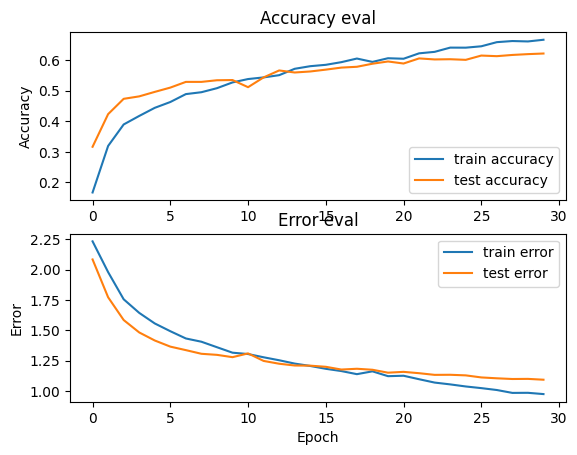

In [13]:
if __name__ == "__main__":

  # create train, validation and test sets (crossvalidation)
  X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

  # build the CNN net
  input_shape = (X_train.shape[1], X_train.shape[2]) # 130, 13 (2D)
  model = build_model(input_shape)

  # compile the network
  optimizer = keras.optimizers.Adam(learning_rate=0.0001)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  model.summary()

  # train CNN
  history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

  # evaluate CNN on the test set
  test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
  print("Accuracy on test set is: {}".format(test_accuracy))

  # make predictions on a sample
  X = X_test[100]
  y = y_test[100]
  predict(model, X, y)

   # plot accuracy and error over the epochs
  plot_history(history)